# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Define the square

In [2]:
x0 = -5
x1 = 5

y0 = -5
y1 = 5

# Define the network

We use a three-layer neural network. We first check if the input $x$ is between $x_0$ and $x_1$ and between $y_0$ and $y_1$. Finally we take the $\text{AND}$ of the previous outputs.

In [3]:
# Activation function
def sigmoid(z):
    return 1/(1+np.exp(-z))

# First layer
roughness = 2
def apply_1(x_in,y_in):
    x_greater = sigmoid(roughness*(x_in-x0))
    x_smaller = sigmoid(-roughness*(x_in-x1))
    
    y_greater = sigmoid(roughness*(y_in-y0))
    y_smaller = sigmoid(-roughness*(y_in-y1))
    
    return (x_greater, x_smaller,y_greater, y_smaller )

# And
def apply_and(x_in,y_in):
    return sigmoid(8*(x_in+y_in-1.5))

def apply_net(x_in, y_in):
    x_greater, x_smaller,y_greater, y_smaller = apply_1(x_in, y_in)
    z2x = apply_and(x_greater, x_smaller)
    z2y = apply_and(y_greater, y_smaller)
    z3  = apply_and(z2x, z2y)
    return z3

# Evaluate the model and plot the results

In [4]:
x_start = -10
x_end = 10

y_start = -8
y_end = 12

Mx = 100
x_in = np.linspace(x_start,x_end,Mx)

My = 100
y_in = np.linspace(y_start,y_end,My)

x_test, y_test = np.meshgrid(x_in, y_in)


f_out = apply_net(x_test.reshape([-1,1,1]),y_test.reshape([-1,1,1]))
f_out = f_out.reshape([My,Mx])

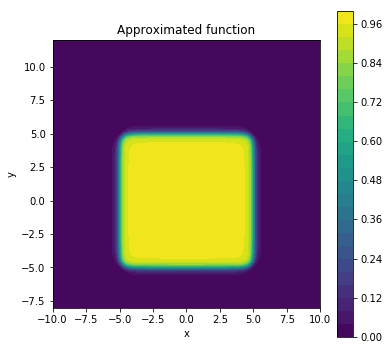

In [5]:
plt.figure(figsize=[6,6])
plt.contourf(x_test,y_test,f_out,30)
plt.colorbar()
plt.title("Approximated function")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')
plt.show()

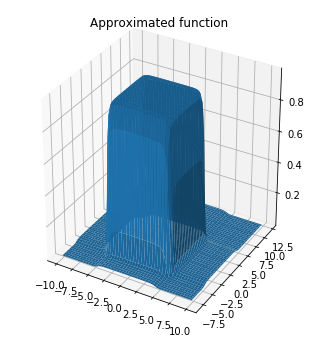

In [6]:
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(1,2,1,projection="3d")
plt.title("Approximated function")
ax.plot_surface(x_test,y_test,f_out)
plt.show()